In [17]:
import pandas as pd
import numpy as np
from numpy import mean, std
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import median, mode, variance,stdev
from pprint import pprint
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.metrics import mean_squared_error 


In [18]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/DataSets/Flight Delay/DelayedFlights.csv")
df = pd.read_csv("../../../../DataSets/DelayedFlights.csv")

In [19]:
df.dropna(axis=0,how='any', inplace = True)
df.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Use Standard scaler to normalise data

In [20]:
columns_to_drop = ["Unnamed: 0","Cancelled","CancellationCode","Diverted","UniqueCarrier","TailNum"]
for value in columns_to_drop:
    if value in  df:
        df.drop(columns_to_drop, axis=1, inplace= True);


df_clear= df[df['Origin']=='SEA']
df_clear.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1324,2008,1,3,4,1457.0,1405,1849.0,1750,972,172.0,...,SEA,ABQ,1180,6.0,15.0,24.0,0.0,7.0,0.0,28.0
1326,2008,1,3,4,1325.0,1255,1553.0,1510,318,88.0,...,SEA,BOI,399,2.0,25.0,11.0,0.0,13.0,0.0,19.0
1329,2008,1,3,4,2022.0,1925,2355.0,2300,1158,153.0,...,SEA,DEN,1024,7.0,18.0,0.0,0.0,0.0,0.0,55.0
1332,2008,1,3,4,2045.0,2010,2140.0,2105,775,55.0,...,SEA,GEG,224,5.0,15.0,0.0,0.0,4.0,0.0,31.0
1333,2008,1,3,4,1753.0,1640,1844.0,1735,1682,51.0,...,SEA,GEG,224,3.0,12.0,0.0,0.0,0.0,0.0,69.0


We used One hot encoder beacuse the data is "Nominal" and needs no order or "Ordinal", so Ordinal Encoder and Label encoder was not used.

In [21]:
# Data Augmentaion
df_clear = pd.get_dummies(df_clear, columns=["Origin", "Dest"], drop_first=True)
df_clear.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_RNO,Dest_SAN,Dest_SFO,Dest_SIT,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_TUS
1324,2008,1,3,4,1457.0,1405,1849.0,1750,972,172.0,...,0,0,0,0,0,0,0,0,0,0
1326,2008,1,3,4,1325.0,1255,1553.0,1510,318,88.0,...,0,0,0,0,0,0,0,0,0,0
1329,2008,1,3,4,2022.0,1925,2355.0,2300,1158,153.0,...,0,0,0,0,0,0,0,0,0,0
1332,2008,1,3,4,2045.0,2010,2140.0,2105,775,55.0,...,0,0,0,0,0,0,0,0,0,0
1333,2008,1,3,4,1753.0,1640,1844.0,1735,1682,51.0,...,0,0,0,0,0,0,0,0,0,0


##Outliers for the data using 2Sigma Rule
Plotting the points to understand the distribution

In [22]:
trial = df_clear
y=trial['ArrDelay']
xbar = np.mean(y) 
v = variance(y)
s = np.std(y)
L=xbar-2*s
U=xbar+2*s
#print(L,U)
outliers = [] 
for i in y: 
    if i > U or i<L: 
        outliers.append(i) 
print('outliers in dataset is', outliers) 
print('Number of Outlier {} vs Number of Total Entries {} percentage {:.2f}%'.format(len(outliers),len(y), (len(outliers)/len(y))*100))
print('Highest Cutoff is {} \nLowest Cutoff is {}'.format(U, L))

print("Mean is: {}\nVariance is: {}\nStandard Deviation is: {}".format(xbar,v,s))
print(len(trial))
trial=trial[(trial.ArrDelay >= L) & (trial.ArrDelay <= U)]
print(len(trial))

outliers in dataset is [208.0, 193.0, 201.0, 232.0, 357.0, 189.0, 202.0, 256.0, 289.0, 329.0, 311.0, 245.0, 221.0, 206.0, 299.0, 176.0, 188.0, 235.0, 250.0, 251.0, 284.0, 235.0, 216.0, 200.0, 364.0, 215.0, 193.0, 243.0, 360.0, 181.0, 195.0, 187.0, 186.0, 191.0, 188.0, 257.0, 186.0, 232.0, 180.0, 189.0, 287.0, 180.0, 223.0, 175.0, 192.0, 194.0, 176.0, 238.0, 208.0, 202.0, 201.0, 206.0, 177.0, 256.0, 203.0, 184.0, 224.0, 197.0, 221.0, 248.0, 236.0, 301.0, 250.0, 231.0, 248.0, 188.0, 182.0, 202.0, 285.0, 192.0, 218.0, 180.0, 212.0, 187.0, 197.0, 192.0, 224.0, 184.0, 228.0, 282.0, 227.0, 228.0, 226.0, 206.0, 177.0, 195.0, 197.0, 339.0, 211.0, 326.0, 183.0, 279.0, 899.0, 411.0, 334.0, 380.0, 183.0, 194.0, 307.0, 302.0, 281.0, 189.0, 229.0, 244.0, 240.0, 186.0, 182.0, 184.0, 242.0, 408.0, 258.0, 235.0, 220.0, 204.0, 217.0, 445.0, 176.0, 186.0, 1267.0, 254.0, 292.0, 204.0, 274.0, 486.0, 1189.0, 191.0, 175.0, 862.0, 309.0, 196.0, 185.0, 225.0, 360.0, 342.0, 201.0, 181.0, 268.0, 177.0, 208.0, 1

Use QQ Plot to check if the data is normal or not, if its normal we can use 2 sigma, and 2 sigma is used beacuse of volume of data. higher volume then lower sigma is possible.

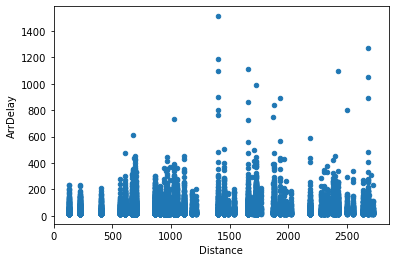

In [23]:
df_clear.plot(x= 'Distance', y='ArrDelay', kind = 'scatter');

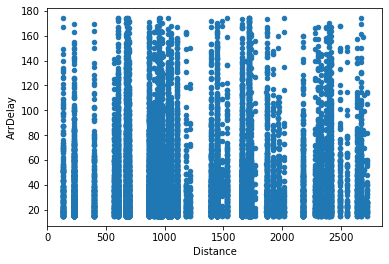

In [24]:
trial.plot(x= 'Distance', y='ArrDelay', kind = 'scatter');

# Continuation Of Main Code without removing Outliers

In [32]:
len(df_clear)

17455

In [25]:
X = df_clear.drop("ArrDelay", axis=1)
y = df_clear["ArrDelay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
models = {}
models["DTR"] = DecisionTreeRegressor()
models["RR"] = RandomForestRegressor()
models["LR"] = LinearRegression()
models["GBR"] = GradientBoostingRegressor()

In [27]:
model_acc = {}
for key in models:
  model_r = models[key]
  dt = model_r.fit(X_train,y_train)
  a = model_r.score(X_test,y_test) 
  model_acc[key] = a
print(model_acc) 

{'DTR': 0.9539952069833081, 'RR': 0.9593621419051552, 'LR': 1.0, 'GBR': 0.9571510012825641}


In [28]:
for key in models:
  model_r = models[key]
  dt = model_r.fit(X_train,y_train)
  pred = dt.predict(X_test) 
  mse=mean_squared_error(pred,y_test)
  rmse=sqrt(mse)
  print(model_r,rmse)

DecisionTreeRegressor() 14.240909853724434
RandomForestRegressor() 11.725831615564442
LinearRegression() 7.69002033433047e-13
GradientBoostingRegressor() 12.125347979568772


**With an R-Score of 0.999 and RMSE of 0.00892 LinearRegression works the best**

In [29]:
dt = LinearRegression().fit(X_train, y_train)

X_tail = X.tail(5)
print(y.tail(5))
print('{} mins'.format(dt.predict(X_tail).astype(int)))

1935383     46.0
1936455     16.0
1936674     30.0
1936676    106.0
1936717    135.0
Name: ArrDelay, dtype: float64
[ 46  16  29 105 135] mins


# Comparision of Normal Data and Data without Outliers

In [30]:
X = trial.drop("ArrDelay", axis=1)
y = trial["ArrDelay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
models1 = {}
models1["DTR"] = DecisionTreeRegressor()
models1["RR"] = RandomForestRegressor()
models1["LR"] = LinearRegression()
models1["GBR"] = GradientBoostingRegressor()
model_acc1 = {}
for key in models:
  model_r1 = models1[key]
  dt1 = model_r1.fit(X_train,y_train)
  a1 = model_r1.score(X_test,y_test) 
  model_acc1[key] = a
print(model_acc1) 
for key in models1:
  model_r1 = models1[key]
  dt1 = model_r1.fit(X_train,y_train)
  pred1 = dt1.predict(X_test) 
  mse1=mean_squared_error(pred1,y_test)
  rmse1=sqrt(mse1)
  print(model_r1,rmse1)

{'DTR': 0.9571510012825641, 'RR': 0.9571510012825641, 'LR': 0.9571510012825641, 'GBR': 0.9571510012825641}
DecisionTreeRegressor() 5.276493735295614
RandomForestRegressor() 3.696263534816191
LinearRegression() 2.0868032945902083e-12
GradientBoostingRegressor() 4.995954406396129


In [31]:
dt1 = LinearRegression().fit(X_train, y_train)

X_tail1 = X.tail(5)
print(y.tail(5))
print('{} mins'.format(dt1.predict(X_tail).astype(int)))

1935383     46.0
1936455     16.0
1936674     30.0
1936676    106.0
1936717    135.0
Name: ArrDelay, dtype: float64
[ 45  15  29 106 134] mins
